In [1]:
import node  
import importlib 
import random
import simulator

# Simulator

In [2]:
importlib.reload(node)
from node import *
random.seed(2)
import pandas as pd
print(number_of_nodes(500))

a = Node('A','fast')

b = Node('B','static')
nodes = [a,b]
nodes_ids = [node.id for node in nodes]

nodes_positions = pd.DataFrame.from_records(np.array([a.position, b.position]).T, columns = nodes_ids, index = ['x', 'y'])

a.get_node_connection(b)
b.node_not_near(a)
print(b.position)
a.move()
a.position
a.known_nodes_info
nodes_positions


22500000
[44, 93]


,A,B
x,29,44
y,24,93


[1.0,
 0.2857142857142857,
 0.5,
 0.6666666666666666,
 0.4,
 0.6666666666666666,
 0.6666666666666666,
 0.5,
 0.4,
 0.5,
 0.6666666666666666,
 0.5,
 0.5,
 0.4,
 0.4,
 0.4,
 0.5,
 0.6666666666666666,
 0.4,
 0.4,
 0.3333333333333333,
 0.6666666666666666,
 0.4,
 1.0,
 0.3333333333333333,
 0.6666666666666666,
 0.4,
 0.5,
 0.4,
 1.0]

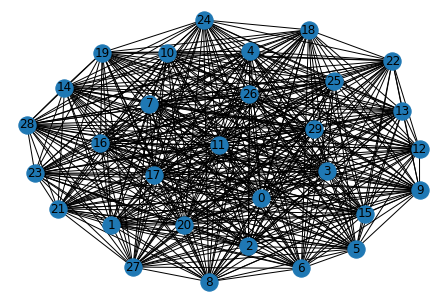

In [25]:
importlib.reload(node)
importlib.reload(simulator)
from simulator import *
import networkx as nx
random.seed(9)

s= Simulator(1/(300*5), classes = {'static':20, 'slow':30, 'fast':50} )

generated_pck = 0
received_pck = 0
energy_consumption = 0

simulation_len = 10
for i in range(simulation_len):
    
    #update distances, B and P_succ of near nodes
    s.update_nodes_info()
    
    #generate new pkts
    
    #for every node with at least a packet start the diffusion
    # a node decide to who he wants to send the packet
    # the reveiver decide if he wants to accept it
    # -> link weights and P_succ update 
    
    
    
  
#nx.draw(s.graph, with_labels = True)
#s.graph.edges(data = True)
#[node.B for node in s.nodes]

In [30]:
for i in range(30):
    print(i)
    s.update_nodes_info()
    #print([node.known_nodes_info for node in s.nodes])
    s.move_nodes()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


# Animation

In [26]:
pos = []
for i in range(400):
    
    a.move()
    b.move()

node_pos = [a.past_positions, b.past_positions]

In [31]:
node_pos = [node.past_positions for node in s.nodes]

In [40]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from matplotlib import animation

###
radius = 10
###

# create a figure and axes
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot() #plt.subplot(1,1,1)

ax2.set_xlim((0,10))
ax2.set_ylim((0,5))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Position')


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
#line3, = ax2.plot([], [], 'y', lw=2)

x_nodes_pos = np.array([node_pos[0,0] for node_pos in node_pos])/30
y_nodes_pos = np.array([node_pos[0,1] for node_pos in node_pos])/30    
circle_patches = []
for dev in range(len(x_nodes_pos)):
    circle = plt.Circle((x_nodes_pos[dev], y_nodes_pos[dev]), radius/30, color='b', fill=False)
    #circle.center = (5, 5)
    circle_patches.append(circle)
    ax2.add_patch(circle)
plt.close()

# animation function. This is called sequentially
def drawframe(n):
    #x = np.linspace(0, 2, 1000)
    #y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    #y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    
    #line1.set_data(x, y1)
    #line2.set_data(x, y2)
    
    #line3.set_data(pos[n][0],pos[n][1])
    
    x_nodes_pos = np.array([node_pos[n,0] for node_pos in node_pos])/30
    y_nodes_pos = np.array([node_pos[n,1] for node_pos in node_pos])/30
    pt1.set_data(x_nodes_pos, y_nodes_pos)
    for dev in range(len(x_nodes_pos)):
        #circle = plt.Circle((x_nodes_pos[dev], y_nodes_pos), 0.5, color='b', fill=False)
        
        circle_patches[dev].center = (x_nodes_pos[dev], y_nodes_pos[dev])
            
    #txt_title.set_text('Frame = {0:4d}'.format(n))
    return [pt1] + circle_patches,

pt1, = ax2.plot([], [], 'g.', ms=10)

# blit=True re-draws only the parts that have changed.
#interval = time
anim = animation.FuncAnimation(fig, drawframe, frames=30, interval=60, blit=False)

HTML(anim.to_html5_video())
